<a href="https://colab.research.google.com/github/xihengjing/xjing/blob/master/Text-mining%20classification%20model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

This project outlines a text-mining classification model using bag-of-words and logistic regression. We will attempt to understand the relationship between Amazon text reviews on earphones and review ratings. Unstructured data analysis will be conducted and there will be some experience with statistics and/or other classification experience.


Data Source: [Kaggle](https://www.kaggle.com/purvank/uber-rider-reviews-dataset/data) by user *Shital Kat*




*   Preliminary Analysis
*   Formatting / Converting Text
*   Logistic Regression
*   Testing / Conclusions



**Preliminary Analysis**

Import Data
First let’s bring in the data and visualize the dataframe:

In [ ]:
#@title Importing Modules
#importing modules
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import random

In [ ]:
#@title Code to import file from colab files (Example 2)
df = pd.read_csv('/content/AllProductReviews.csv')
df.head(5)

FileNotFoundError: ignored

In [ ]:
#@title Load data
url = 'https://raw.githubusercontent.com/xihengjing/xjing/master/AllProductReviews.csv'

# Load data into a pandas dataframe
df = pd.read_csv(url)
df.head()

,ReviewTitle,ReviewBody,ReviewStar,Product
0,Honest review of an edm music lover\n,No doubt it has a great bass and to a great ex...,3,boAt Rockerz 255
1,Unreliable earphones with high cost\n,"This earphones are unreliable, i bought it be...",1,boAt Rockerz 255
2,Really good and durable.\n,"i bought itfor 999,I purchased it second time,...",4,boAt Rockerz 255
3,stopped working in just 14 days\n,Its sound quality is adorable. overall it was ...,1,boAt Rockerz 255
4,Just Awesome Wireless Headphone under 1000...😉\n,Its Awesome... Good sound quality & 8-9 hrs ba...,5,boAt Rockerz 255


In [ ]:
#@title Choosing apprpiate columns
df2 = df[['ReviewBody', 'ReviewStar']] 
df = df2
df.head()

,ReviewBody,ReviewStar
0,No doubt it has a great bass and to a great ex...,3
1,"This earphones are unreliable, i bought it be...",1
2,"i bought itfor 999,I purchased it second time,...",4
3,Its sound quality is adorable. overall it was ...,1
4,Its Awesome... Good sound quality & 8-9 hrs ba...,5


It’s a straightforward dataset. We have the "ReviewBody” text column and the “ReviewStar” column (which ranges from 1 as the lowest rating and 5 as the highest). Users write these text reviews to describe their experience and the categorical 5 star rating summarizes it.

**Basic Statistics**

Let’s check the .describe() method to see how many instances we’re dealing with and other basic statistics:

In [ ]:
df.describe() 

,ReviewStar
count,14337.000000
mean,3.675874
std,1.503409
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


It appears the customers' response on this particular earphone is fairly well in this sample. The mean rating is 3.68, and the 25% mark is a 3 star review, meaning that 75% of the reviews are above 3. Also, the 75% mark of a 5 star rating means that we have at least 25% of ratings at 5 star. This shows that the data is skewed to the right. Hopefully we can gain some insight into this by building a model.

**Purpose of Model**

Having mentioned that, let’s reiterate the utility of the bag of words / logistic regression model we will build:


*   We will be able to gauge the sentiment of future text reviews and categorize them into “Good” or “Bad” classes.
*   We will be able to pinpoint specific words with a high impact on rating sentiment. This information could be an asset for the sellers and Amazon (if used for their entire internal dataset — not this small sample we have). For example, the word “rude” likely has a negative coefficient, pushing our classifier to label that review as bad. The word “great” likely has a positive coefficient, pushing our classifier to label that review as good. The goal is discovery. We don’t know what interesting words may appear to have an impact on sentiment, and that’s the fun part. Does the word “great” outweigh “horrible” and net positive or negative? Many questions like this will be answered with our model.



**Null Check**

Moving on, let’s check for null values in the dataset:

In [ ]:
#checking for nulls
null_count = df.isnull().sum()
null_count

ReviewBody    0
ReviewStar    0
dtype: int64

None this time. If we had some nulls, we would need to explore how to deal with those. Many good resources exist on this topic you can research.

**Distributions**

Next, let’s visualize the rating distribution of our data:

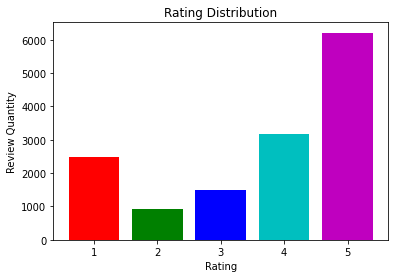

In [ ]:
#@title Visualization
#seperating by groups
groups = df.groupby('ReviewStar').count()
Values = groups.ReviewBody
colors = ['r', 'g', 'b', 'c', 'm']
#making bar plot
plt.bar([1,2,3,4,5], Values, color = colors)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Review Quantity')
plt.show()

**Logistic Regression**

In statistics, the logistic model (or logit model) uses a logistics function to model a binary dependent variable. The dependent variable or the outcome would usually have binary results, either success or fail(1 or 0), or in other cases, like/dislike, good/bad, etc.. The logistics function will predict the rate or probability of the success event in multiple groups. For example, coronary issues would grow gradually with raising age, and hence the probability of coronary issues happening will grow from lower age groups to higher age groups. The probability of each group will add up to one. 



**Setiment Rule**

In order to perform the logistic regression later, we need to figure out a way to turn these 5 ratings categories into binary classes (1 and 0). Remember, logistic regression only handles “either/or” target variables. The best way to turn the star ratings into binary classes(in my opinion) is:

Set ratings below 3 stars as class 0 (negative sentiment)

Set ratings above 3 as class 1 (positive sentiment)

Delete the 3 star ratings. 3 stars are neutral and offer no sentiment insight.

So, let’s make a new column that deletes the 3 star ratings and creates a new column which classifies the other ratings into binary classes:

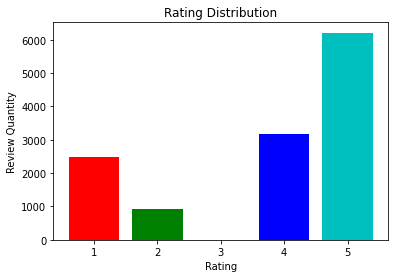

In [ ]:
#@title Dropping data that will not help in out modeling
#deleting all instances with ReviewStar = 3
df = df[df.ReviewStar != 3]
#separating by groups
groups = df.groupby('ReviewStar').count()
Values = groups.ReviewBody
colors = ['r', 'g', 'b', 'c']
#making bar plot
plt.bar([1,2,4,5], Values, color= colors)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Review Quantity')
plt.show()

In [ ]:
#@title Creating new binary_class column
df['binary_class'] = np.where(df['ReviewStar'] > 3, 1, 0)
df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ReviewBody,ReviewStar,binary_class
1,"This earphones are unreliable, i bought it be...",1,0
2,"i bought itfor 999,I purchased it second time,...",4,1
3,Its sound quality is adorable. overall it was ...,1,0
4,Its Awesome... Good sound quality & 8-9 hrs ba...,5,1
5,"After 11 days, the charging port isn't working...",1,0
...,...,...,...
14332,Good\n,4,1
14333,An amazing product but a bit costly.\n,5,1
14334,Sound\n,1,0
14335,the sound is good battery life is good but the...,5,1


# **Formatting / Converting Text**
**Train/Test Split**

The first step in this process is separating our data into training and testing sets. We will create our model from the training data and save some instances for testing purposes later. We’re using sklearn to shuffle and split. Without messing with the parameters, it should split our data into 75% training and 25% testing.

By calling X_train.shape, we can check this. Further, let’s print a random review to verify it worked and to remind ourselves what we’re working with.

In [ ]:
#@title Splitting into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['ReviewBody'], df['binary_class'], random_state = 0)
#setting random number between 1 and 1000
number = random.randint(1,1000)
#printing random training text and X_train shape
print ('Random Review:')
print(' ')
print(X_train[number])
print(' ')
print('X_train shape: ' + str(X_train.shape))

Random Review:
 
Sound quality is good phone reception quality is also good but am unable to play pubg using this because of it take 2sec time to receive sound from mobile while playing pubg

 
X_train shape: (9625,)


**Turning words into numbers**

Now comes the exciting part, translating our text data into numerical features. In order to run a regression though this data later, we need to have a feature for every word in our sample. Essentially, we will be translating each word to be assigned as a number and then counting the frequency of these word/numbers used per instance in matrices. The process of doing this is called **“Bag-of-words”**. It’s important to note that the order of words doesn’t matter, bag-of-words only counts the frequency per instance of words used. To start, we will use the Sklearn CountVectorizer

In [ ]:
#@title Turning words into numbers
#importing countvectorizer
from sklearn.feature_extraction.text import CountVectorizer
#creating variable which assigns X_train to numbers
vect = CountVectorizer().fit(X_train)
#translates numbers back to text
vect.get_feature_names()[1:10]

['000', '001', '00bt', '00g', '02143121', '03', '04', '05', '06']

We can see using the len(vect.get_feature_names()) method, there are a total of 8,612 words in all the reviews:

In [ ]:
#length of total words
len(vect.get_feature_names())

8612

Now, let’s transform our X_train data into a matrix which contains the documents (instances) as rows and the count of new features (8,612) as columns. For example, our first word (0) as seen above is “000”. That will be the first column in the matrix. Whichever reviews contain '000' will tally up how many times it was used and add it to that column. 

In [ ]:
#@title Creating matrix array for logistic regression
X_train_vectorized = vect.transform(X_train)
print (X_train_vectorized.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Because there are so many words and most reviews only have a small portion of them, most of the numbers in this array will be 0.

**Logistic Regression**

**Building Model**

We finally made it to the regression.
Again, we will be using sklearn to perform this model:

In [ ]:
#@title Creating Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Now, we will calculate the AUC to see how well it classifies the test data.

AUC (Area Under The Curve) ROC (Receiver Operating Characteristics)

AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. By analogy, Higher the AUC, better the model is at distinguishing between good and bad reviews.

In [ ]:
#@title Calculating AUC
from sklearn.metrics import roc_auc_score
predictions = model.predict(vect.transform(X_test))
print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.8575261440051657


This is good. A rough way of understanding this metric is to say we have 86% correctly classified instances.

**Testing / Conclusions**

**Positive and Negative Words**

Let’s delve into which words have the highest impact on class separation. Here we are translating our numbers back into words, getting the coefficients outputted by the regression, adding them both into a dataframe, and sorting them by their coefficient.

In [ ]:
#creating array variable of all the words
feature_names = np.array(vect.get_feature_names())
#creating array of all the regression coefficients per word
coef_index = model.coef_[0]
#creating df with both arrays in it
df = pd.DataFrame({'Word':feature_names, 'Coef': coef_index})
#sorting by coefficient
df.sort_values('Coef')

,Word,Coef
8473,worst,-3.065365
8269,waste,-2.451746
5766,poor,-2.429334
5550,pathetic,-2.329705
7258,stopped,-2.190887
...,...,...
4656,love,2.047238
5177,nice,2.183999
1252,best,2.410673
2994,excellent,2.603525


**Negative Sentiment:**

'worst' is the most negatively correlated word. The rest of the 4 words also make sense as they all concey negative emotion toward the product

**Positive Sentiment:**

As you move down the dataframe, the words become more positively correlated.

'awesome' is the highest, it has relatively the same weight as 'worst'.

The rest of the positively correlated words are intuitively showing positive emotion toward the product.


**Testing custom reviews**

Lastly, we can experiment and test our own custom reviews. In bold below are the inputs and beneath that are the respective outputs (1 = positive; 0 = negative). The reason the first one came out as positive might be that the coefficient correlated with 'great' is higher than that correlated with 'abandoned' and hence a positive 1 is returned. The rest of the classification seem to be accurate except for the 6th one.

In [ ]:
print(model.predict(vect.transform(['abandoned great'])))
print(model.predict(vect.transform(['Who doesn’t love a clean car? If your driver takes great care of theirs, go ahead and say thanks.'])))
print(model.predict(vect.transform(['great she the best'])))
print(model.predict(vect.transform(['cool, safe, fun'])))
print(model.predict(vect.transform(['charged slow horrible'])))
print(model.predict(vect.transform(['it was as average as a trip could be'])))
print(model.predict(vect.transform(['my family felt safe we got to our destination with ease'])))
print(model.predict(vect.transform(['i got to my destination quickly and affordably i had a smile on my face from start to finish'])))
print(model.predict(vect.transform(['hard, bad, cool'])))
print(model.predict(vect.transform(['000'])))

[1]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[0]
[1]


In [ ]:
print(model.predict(vect.transform(["I bought this phone and it came in its usual packaging but not factory sealed. Just a yellow sticker. During setup, everything was in Spanish and I switched it to English and followed through with the setup. Even after setup, many apps were in Spanish. I put my Straight Talk SIM card in and nothing. I couldn't text, call, browse, etc. I'm pretty sure I was sent an International phone. I also kept getting a message that said Open channel for BIP. I had no issues with my Galaxy S9 Plus. For $999, you'd think they'd sent the right product. It's a shame because the phone I ordered was beautiful but useless."])))

[0]


Learning - The fit of the model depends on the quality of the dataset we obtain. The better the quality of the data, the more accurate the model's classification will be.